In [1]:
#reading the respective files from the path variables
#to run replace the path variables with relevent ones
#encoding used iso-8859-1
import pandas as pd
import numpy as np
companies_path= "C:\\Users\\shera\\Desktop\\New folder\\Work\\Upgrad\\Assignment\\Assignment_1\\companies.txt "
rounds2_path= "C:\\Users\\shera\\Desktop\\New folder\\Work\\Upgrad\\Assignment\\Assignment_1\\rounds2.csv"
mapping_path="C:\\Users\\shera\\Desktop\\New folder\\Work\\Upgrad\\Assignment\\Assignment_1\\mapping.csv"
companies = pd.read_csv(companies_path, sep ='\t', encoding='iso-8859-1')
rounds2 = pd.read_csv(rounds2_path, encoding='iso-8859-1')
mapping= pd.read_csv(mapping_path, encoding='iso-8859-1')

In [2]:
#custom function to equalize the permalink values of both dataframes, companies and rounds2
def tolower(x):
    return x.lower()

rounds2.company_permalink=rounds2['company_permalink'].apply(tolower)
companies.permalink=companies['permalink'].apply(tolower)


In [3]:
#creating a master_frame by merging the two dataframes
master_frame=companies.merge(rounds2, left_on='permalink', right_on='company_permalink', how='inner')


In [4]:
#shape of the new master_frame
master_frame.shape

(114942, 16)

In [5]:
#Removing null values from the 'raised_amount_usd' column
master_frame.drop(master_frame.loc[master_frame.raised_amount_usd.isnull()].index , axis=0, inplace=True)

In [6]:
#Checking for null values in the columns
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66789
funded_at                      0
raised_amount_usd              0
dtype: int64

In [7]:
#Calculating the mean funding amount for different funding types, so as to determine the best investment type
#Venture is the determined investment type
mean_usd= master_frame.groupby('funding_round_type').raised_amount_usd.mean().astype('str')
mean_usd

funding_round_type
angel                     958694.4697530865
convertible_note         1453438.5431928127
debt_financing           17043526.023046993
equity_crowdfunding       538368.2109120521
grant                      4300576.33945386
non_equity_assistance    411203.05479452055
post_ipo_debt             168704571.8223684
post_ipo_equity           82182493.87101911
private_equity            73308593.02944215
product_crowdfunding     1363131.0699481866
secondary_market                 79649630.1
seed                      719779.6202016778
undisclosed              19242370.225663718
venture                  11748949.129489528
Name: raised_amount_usd, dtype: object

In [8]:
#Removing null data from the 'country_code' column
#Retaining only the rows which have venture type investment
master_frame.drop(master_frame.loc[master_frame.country_code.isnull()].index , axis=0, inplace=True)
master_frame.drop(master_frame.loc[master_frame.funding_round_type!='venture'].index , axis=0, inplace=True)

In [9]:
#Calculating the amount of investments for each country
#Calculating the number of investments for each country
#Determining the top 9
country_amount= pd.DataFrame(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype('str'))
country_ninv= pd.DataFrame({'number_of_inv': master_frame.groupby('country_code')['raised_amount_usd'].count().sort_values(ascending=False)})
top9 = country_amount.head(9)
top9

,raised_amount_usd
country_code,
USA,422510842796.0
CHN,39835418773.0
GBR,20245627416.0
IND,14391858718.0
CAN,9583332317.0
FRA,7259536732.0
ISR,6907514579.0
DEU,6346959822.0
JPN,3363676611.0


In [10]:
#Number of investments
country_ninv.head()

,number_of_inv
country_code,
USA,36139
GBR,2055
CHN,1564
CAN,1256
FRA,917


In [11]:
#Loading the mapping file
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [12]:
#Dropping irrelevent and null data from the mapping file
mapping.drop(mapping.loc[mapping.category_list.isnull()].index, axis=0, inplace=True)
mapping.drop('Blanks', axis=1, inplace=True)
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [13]:
#Mapping sectors in the category_list to their main_sectors
for i in range(1, len(mapping.index) + 1):
    for j in mapping.columns:
        if j!='category_list'and mapping.loc[i,j]==1:
            mapping.loc[i,'main_sector']=j
           
            

In [14]:
#Removing null values from the category_list in the master_frame
master_frame.drop(master_frame.loc[master_frame.category_list.isnull()].index, inplace=True)

In [15]:
#Extracting the primary_sector from the category_list column for the master_frame
for i in master_frame.index:
    if '|' in master_frame.loc[i,'category_list']:
        clist = str(master_frame.loc[i,'category_list']).split('|')
        master_frame.loc[i,'primary_sector']= clist[0]
    else:
        master_frame.loc[i,'primary_sector'] = master_frame.loc[i,'category_list']


In [16]:
#Merging the mapping file and the master_frame on the primary_sector
master_frame= pd.merge(master_frame, mapping, how='inner', left_on='primary_sector', right_on='category_list')

In [17]:
#Determining the null values in the master_frame post merging
master_frame.isnull().sum()

permalink                                      0
name                                           0
homepage_url                                2019
category_list_x                                0
status                                         0
country_code                                   0
state_code                                   692
region                                       578
city                                         578
founded_at                                  7974
company_permalink                              0
funding_round_permalink                        0
funding_round_type                             0
funding_round_code                         20005
funded_at                                      0
raised_amount_usd                              0
primary_sector                                 0
category_list_y                                0
Automotive & Sports                            0
Cleantech / Semiconductors                     0
Entertainment       

In [18]:
#Dropping the irrelevent categories in master_frame
master_frame.drop(['category_list_y','Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],axis=1, inplace=True)

In [19]:
#Renaming the column category_list in master_frame
master_frame.rename(columns={'category_list_x': 'category_list'}, inplace=True)


In [20]:
#Creating three individual dataframes for the chosen countries
D1=master_frame.loc[ (master_frame.country_code=='USA') & (master_frame.raised_amount_usd >= 5000000.0) & (master_frame.raised_amount_usd <= 15000000.0), :]
D2=master_frame.loc[(master_frame.country_code=='GBR')& (master_frame.raised_amount_usd >= 5000000.0) & (master_frame.raised_amount_usd <= 15000000.0), :]
D3=master_frame.loc[(master_frame.country_code=='IND')& (master_frame.raised_amount_usd >= 5000000.0) & (master_frame.raised_amount_usd <= 15000000.0), :]

In [21]:
#Calculating the sectorwise investments and amounts for each country
D1_sect_count=pd.DataFrame({'no_investments':D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)})
D1_sect_amt=pd.DataFrame({'amount_usd':D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).astype(str)})

In [22]:
D2_sect_count=pd.DataFrame({'no_investments':D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)})
D2_sect_amt=pd.DataFrame({'amount_usd':D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).astype(str)})

In [23]:
D3_sect_count=pd.DataFrame({'no_investments':D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)})
D3_sect_amt=pd.DataFrame({'amount_usd':D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).astype(str)})

In [24]:
#Calculating the total investments and their amount for each country
D1_total_inv=D1.raised_amount_usd.count()
D2_total_inv=D2.raised_amount_usd.count()
D3_total_inv=D3.raised_amount_usd.count()

D1_total_usd=D1.raised_amount_usd.sum()
D2_total_usd=D2.raised_amount_usd.sum()
D3_total_usd=D3.raised_amount_usd.sum()


In [25]:
#total investments for D1 
D1_total_inv

11149

In [26]:
#total investments for D2
D2_total_inv

577

In [27]:
#total investments for D3
D3_total_inv

299

In [28]:
#total investments sum for D1
D1_total_usd

99661524549.0

In [29]:
#total investments sum for D2
D2_total_usd

5028704358.0

In [30]:
#total investments sum for D3
D3_total_usd

2683537552.0

In [31]:
#Sectorwise amount for D1
D1_sect_amt

,amount_usd
main_sector,
Others,26089280296.0
Cleantech / Semiconductors,21181003033.0
"Social, Finance, Analytics, Advertising",16680695048.0
"News, Search and Messaging",13796816094.0
Health,8200859357.0
Manufacturing,7258553378.0
Entertainment,5000212982.0
Automotive & Sports,1454104361.0


In [32]:
#Sectorwise amount for D2
D2_sect_amt

,amount_usd
main_sector,
Others,1249124289.0
Cleantech / Semiconductors,1136905008.0
"Social, Finance, Analytics, Advertising",821888357.0
"News, Search and Messaging",615746235.0
Entertainment,461511059.0
Manufacturing,361940335.0
Health,214537510.0
Automotive & Sports,167051565.0


In [33]:
#Sectorwise amount for D3
D3_sect_amt

,amount_usd
main_sector,
Others,1007409507.0
"News, Search and Messaging",433834545.0
"Social, Finance, Analytics, Advertising",290543500.0
Entertainment,280830000.0
Manufacturing,200900000.0
Health,167740000.0
Cleantech / Semiconductors,165380000.0
Automotive & Sports,136900000.0


In [34]:
#Sectorwise investments for D1
D1_sect_count

,no_investments
main_sector,
Others,2923
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912
"News, Search and Messaging",1563
Health,908
Manufacturing,799
Entertainment,580
Automotive & Sports,167


In [35]:
#Sectorwise investments for D2
D2_sect_count

,no_investments
main_sector,
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98
"News, Search and Messaging",73
Entertainment,54
Manufacturing,42
Health,24
Automotive & Sports,16


In [36]:
#Sectorwise investments for D3
D3_sect_count

,no_investments
main_sector,
Others,109
"News, Search and Messaging",52
Entertainment,33
"Social, Finance, Analytics, Advertising",32
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13


In [37]:
#Sectorwise and company investment amounts for D1
D1.groupby(['main_sector','name'])['raised_amount_usd'].sum().sort_values(ascending=False).astype(str).head(10)

main_sector                              name                 
News, Search and Messaging               Airspan Networks         81769000.0
Cleantech / Semiconductors               Biodesix                 75300000.0
Entertainment                            Avnera                   71062970.0
Cleantech / Semiconductors               Tigo Energy              68739496.0
Health                                   EndoGastric Solutions    67896724.0
Others                                   Virtustream              64300000.0
Social, Finance, Analytics, Advertising  Intacct                  61800000.0
Cleantech / Semiconductors               ForSight Labs            61300001.0
Social, Finance, Analytics, Advertising  Lotame                   59700000.0
                                         ChoiceStream             58300000.0
Name: raised_amount_usd, dtype: object

In [38]:
#Sectorwise and company investment amounts for D2
D2.groupby(['main_sector','name'])['raised_amount_usd'].sum().sort_values(ascending=False).astype(str).head(10)

main_sector                              name                  
Automotive & Sports                      GreenRoad Technologies    52500000.0
Social, Finance, Analytics, Advertising  Celltick Technologies     37500000.0
News, Search and Messaging               Ubiquisys                 37000000.0
Others                                   Electric Cloud            37000000.0
                                         SenSage                   36250000.0
News, Search and Messaging               brylle                    36000000.0
Cleantech / Semiconductors               EUSA Pharma               35600000.0
Automotive & Sports                      Autoquake                 35557140.0
Social, Finance, Analytics, Advertising  myThings                  34000000.0
Others                                   Enigmatec                 32500000.0
Name: raised_amount_usd, dtype: object

In [39]:
#Sectorwise and company investment amounts for D3
D3.groupby(['main_sector','name'])['raised_amount_usd'].sum().sort_values(ascending=False).astype(str).head()

main_sector                 name        
Cleantech / Semiconductors  Azure Power     47200000.0
Others                      FirstCry.com    39000000.0
                            Myntra          38000000.0
News, Search and Messaging  GupShup         33000000.0
Others                      CommonFloor     32900000.0
Name: raised_amount_usd, dtype: object

In [40]:
#Invest_type DataFrame for graphs
invest_type=rounds2.drop(rounds2.loc[rounds2.raised_amount_usd.isnull()].index)
invest_type

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [41]:
#Investment amounts for each investment type
invest_amount=pd.DataFrame({'total_usd':invest_type.groupby('funding_round_type')['raised_amount_usd'].sum()})

In [42]:
#Average amount for each investment type
invest_type_avg=pd.DataFrame({'average_amount':invest_type.groupby('funding_round_type')['raised_amount_usd'].mean()})

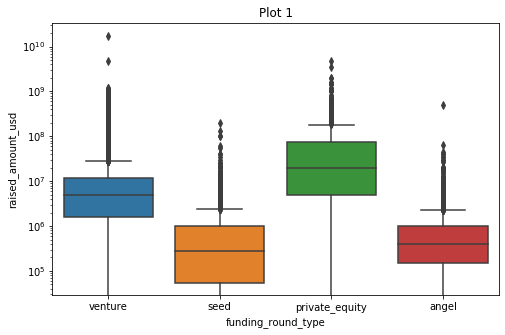

In [50]:
#first Plot
import matplotlib.pyplot as plt
import seaborn as sns

invest_type_main = invest_type.loc[(invest_type.funding_round_type=='venture')|(invest_type.funding_round_type=='angel')|(invest_type.funding_round_type=='seed')|(invest_type.funding_round_type=='private_equity'),:]
sum=invest_type_main.raised_amount_usd.sum()
plt.figure(figsize=(8,5))
sns.boxplot(x=invest_type_main['funding_round_type'], y=invest_type_main['raised_amount_usd'] , data=invest_type_main)
plt.yscale('log')
plt.title('Plot 1')
plt.show()

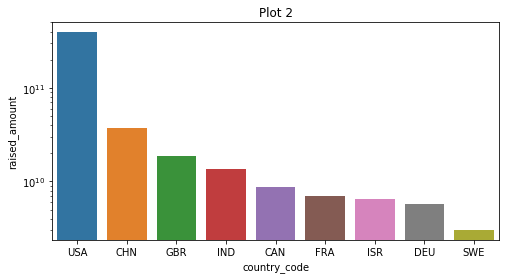

In [45]:
#Second plot
country_comp=pd.DataFrame({'raised_amount':master_frame.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False).head(9)})
country_comp
plt.figure(figsize=(8,4))
sns.barplot(x = country_comp.index, y = country_comp['raised_amount'], data=country_comp)
plt.yscale('log')
plt.title('Plot 2')
plt.show()


In [46]:
#Master frame for merging to create third plot
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44687,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Tracking,Others
44688,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Tracking,Others
44689,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Tracking,Others
44690,/organization/yunnan-landsun-green-industry-gr...,Yunnan Landsun Green Industry (Group),http://www.lstea.tech-food.com/,Tea,operating,CHN,29,CHN - Other,Simao,01-05-1996,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,NaN,01-07-2007,7227332.0,Tea,Others


In [47]:
#sector wise grouping for third plot
sector_gr= master_frame.loc[(master_frame.country_code=='USA')|(master_frame.country_code=='GBR')|(master_frame.country_code=='IND')]



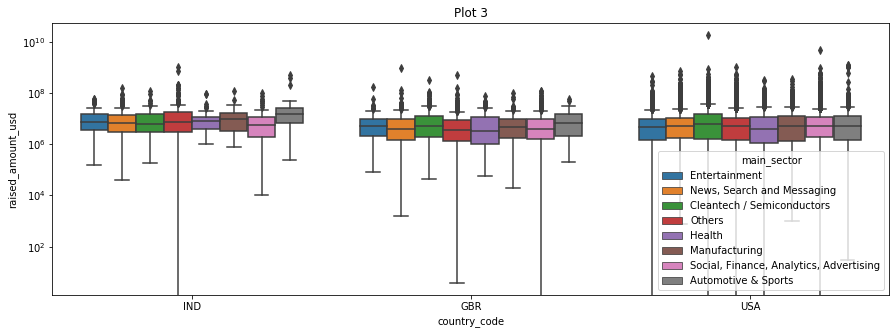

In [49]:
#Third Plot
plt.figure(figsize=(15,5))
sns.boxplot( x = sector_gr['country_code'], y= sector_gr['raised_amount_usd'],hue=sector_gr['main_sector'], data= sector_gr)
plt.title('Plot 3')
plt.yscale('log')
plt.show()